In [ ]:
# Margaret Johnston
# Homework 4 - due 21 February

# Homework:

Homework: Write your own Euler or any scheme to calculate the orbit of two equal mass binary.

The mass of each binary makes GM$_{i}$=1, (i is 1 or 2). The two binary stars are seperated by a distance of 1 initially. 

Initialize the binary velocity so that each binary star will have an eccentricity of 0.0. Evolve this system to 100 binary orbits, and plot their orbits in the x-y plane. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

It's important to understand the orbit analytically before attempting to do anything numerically.

Analytically, we start with a six dimensional problem with two bodies moving in three dimensional space ($x_{1}$, $y_{1}$, $z_{1}$, $x_{2}$, $y_{2}$, $z_{2}$). First we identify the plane which the orbits occupy, reducing the dimensionality to four ($x_{1}$, $y_{1}$, $x_{2}$, $y_{2}$). We would solve the problem an orbiting binary by moving into the frame of one the larger mass and using the reduced mass $\mu$ as the orbiting body. This reduces the dimensionality from four ($x_{1}$, $y_{1}$, $x_{2}$, $y_{2}$) to two ($x_{\mu}$, $y_{\mu}$), and is identical to the planet orbiting a star which we solved in class. 

However, since we can solve this numerically, we don't need to worry so much about reducing the dimensionality of the problem to this extreme. In fact, because we want to track the motions of both stars, it is advantagous to keep the information of the four dimensional problem. 

The problem can be expressed as two bodies moving in the orbital plane:

$\frac{d x_{1}}{dt}=v_{x_{1}}\\
\frac{d v_{x_{1}}}{dt}=-\frac{GM_{1}M_{2}}{r_{1}^3}x_{1}\\
\frac{d y_{1}}{dt}=v_{y_{1}}\\
\frac{d v_{y_{1}}}{dt}=-\frac{GM_{1}M_{2}}{r_{1}^3}y_{1}\\
\frac{d x_{2}}{dt}=v_{x_{2}}\\
\frac{d v_{x_{2}}}{dt}=-\frac{GM_{1}M_{2}}{r_{2}^3}x_{2}\\
\frac{d y_{2}}{dt}=v_{y_{2}}\\
\frac{d v_{y_{2}}}{dt}=-\frac{GM_{2}M_{2}}{r_{2}^3}y_{2}\\
$

where $r_{1}=\sqrt{x_{1}^2+y_{1}^2}$, $r_{2}=\sqrt{x_{2}^2+y_{2}^2}$ 

So long as we start the objects symmetrically about the center of mass, ensuring the center of mass is along the line which connects the two bodies, our solution will be valid.

In [2]:
# the vector of first order ODEs
def f(t, y):
    f=np.zeros(8)
    r1=np.sqrt(y[0]*y[0]+y[2]*y[2])
    r2=np.sqrt(y[4]*y[4]+y[6]*y[6])
    f[0]=y[1]
    f[1]=-G*M1*M2/r1/r1/r1*y[0]
    f[2]=y[3]
    f[3]=-G*M1*M2/r1/r1/r1*y[2]
    f[4]=y[5]
    f[5]=-G*M1*M2/r2/r2/r2*y[4]
    f[6]=y[7]
    f[7]=-G*M1*M2/r2/r2/r2*y[6]
    return f
    
# Runga-Kutta for updating the posiitions
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1 = h*f(t,y)
    k2 = h*f(t+0.5*h,y+0.5*k1)
    k3 = h*f(t+0.5*h,y+0.5*k2)
    k4 = h*f(t+0.5*h,y+k3) 
    y += (k1+2*k2+2*k3+k4)/6
    return y


In [15]:
G = 1.
M1= 1.
M2= 1.
# run the simulation for 100 orbits
tmax=200.*np.pi 
h=0.001
# initialize the positions to have a separation of 1, the velocities must by +-\sqrt(2)
y=[.5,0.,0.,np.sqrt(2),-.5,0.,0.,-np.sqrt(2)]
t=0

xs1 = [] # position of star 1 storage
ys1 = []
xs2 = [] # position of star 2 storage
ys2 = []

while(t<tmax):
    if((t+h)>tmax):
        h=tmax-t
    y  = rk4(t,h,y,4)
    xs1= np.append(xs1,y[0])
    ys1= np.append(ys1,y[2])
    xs2= np.append(xs2,y[4])
    ys2= np.append(ys2,y[6])
    t  = t+h
    

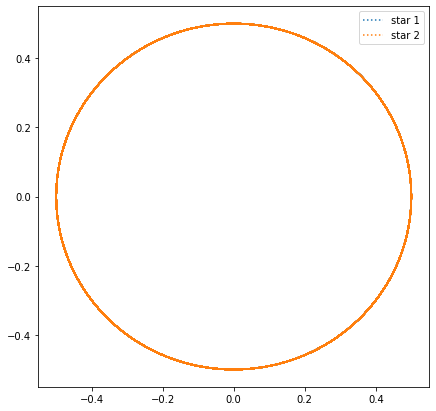

In [17]:
plt.figure(figsize=(7,7))
plt.plot(xs1,ys1,':',label='star 1')
plt.plot(xs2,ys2,':',label='star 2')
plt.legend(loc='upper right')

plt.show()

With an eccentricity of 1 and a symmetric separation, the two stars occupy the same orbit. 

With the Runga-Kutta method, we have excellent agreement with this result.